# Import file

In [2]:
# Import necessary libraries
import pandas as pd

# Load the Excel file into a DataFrame
file_path = "challenge1.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to inspect the data
print(df.head())

# Perform basic analysis (e.g., checking column names and data types)
print(df.info())

    month  year                                          image_url  \
0   April  2014  https://birdcount.in/wp-content/uploads/2014/0...   
1     May  2014  https://birdcount.in/wp-content/uploads/2014/0...   
2    June  2014  https://birdcount.in/wp-content/uploads/2014/0...   
3    July  2014  https://birdcount.in/wp-content/uploads/2014/0...   
4  August  2014  https://birdcount.in/wp-content/uploads/2014/0...   

                              article_url  list_based  location_based  \
0   https://birdcount.in/apr14-challenge/         1.0             0.0   
1   https://birdcount.in/may14-challenge/         1.0             0.0   
2  https://birdcount.in/june14-challenge/         1.0             1.0   
3   https://birdcount.in/jul14-challenge/         1.0             0.0   
4   https://birdcount.in/aug14-challenge/         1.0             0.0   

   species_based  habitat_based  media_based  time_based  ...  \
0            0.0            0.0          0.0         1.0  ...   
1         

# Who qualifies how many times

In [3]:
import pandas as pd
import ast
from collections import Counter

# Ensure the column exists before processing
if "names_of_birders" in df.columns:
    # Function to safely parse the string and extract names
    def extract_names(name_list_str):
        try:
            # Convert string to list
            names = ast.literal_eval(name_list_str)
            return names
        except Exception:
            return []

    # Apply the function to extract names
    df["extracted_names"] = df["names_of_birders"].apply(extract_names)

    # Flatten the list of names and count their frequency
    all_names = [name for sublist in df["extracted_names"] for name in sublist]
    name_counts = Counter(all_names)

    # Create a new DataFrame with names and their frequency
    people_freq = pd.DataFrame(name_counts.items(), columns=["name", "frequency"])

    # Sort the DataFrame by frequency in descending order
    people_freq = people_freq.sort_values(by="frequency", ascending=False)

    # Display the new DataFrame
    print(people_freq)
else:
    print("Column 'names_of_birders' does not exist in the DataFrame.")

                          name  frequency
1944          Lakshmikant Neve        100
2130    Sreekumar Chirukandoth         82
572              Jayadev Menon         79
10    Panchapakesan Jeganathan         77
8                  Manju Sinha         73
...                        ...        ...
2112                  Satish K          1
2114            Savithri Raman          1
2115              Selvarajan V          1
2116            Shafeeq Wilson          1
4509               Trivedi Gvn          1

[4510 rows x 2 columns]


In [4]:
df

,month,year,image_url,article_url,list_based,location_based,species_based,habitat_based,media_based,time_based,...,number_of_lists,number_of_species,number_of_unique_lists_with_media,names_of_birders,winner_name,location_of_challenge,checklist_requirements.1,extra_condition,bird_species_mentioned,extracted_names
0,April,2014,https://birdcount.in/wp-content/uploads/2014/0...,https://birdcount.in/apr14-challenge/,1.0,0.0,0.0,0.0,0.0,1.0,...,1237.0,NaN,NaN,"[""Aidan & Savio Fonseca"", ""Anish Aravind"", ""Ar...",Ganeshwar S V,India,upload at least 20 complete lists,NaN,"[""Blyth’s Tragopan""]","[Aidan & Savio Fonseca, Anish Aravind, Arya Vi..."
1,May,2014,https://birdcount.in/wp-content/uploads/2014/0...,https://birdcount.in/may14-challenge/,1.0,0.0,0.0,0.0,0.0,1.0,...,1179.0,NaN,NaN,"[""Aidan & Savio Fonseca"", ""Anish Aravind"", ""Ar...",Bela Arora,India,upload at least 4 complete lists in each week ...,‘group’ accounts are excluded from the eBirdin...,"[""Brown-headed Gull"", ""Chroicocephalus brunnic...","[Aidan & Savio Fonseca, Anish Aravind, Arya Vi..."
2,June,2014,https://birdcount.in/wp-content/uploads/2014/0...,https://birdcount.in/june14-challenge/,1.0,1.0,0.0,0.0,0.0,1.0,...,1023.0,NaN,NaN,"[""abhijith a.p.c"", ""Abhijith surendran"", ""abhi...",Sudhakaran KK,India,at least 5 complete lists from each of 4 disti...,Group accounts are excluded,"[""Sanderling"", ""Calidris alba""]","[abhijith a.p.c, Abhijith surendran, abhirami-..."
3,July,2014,https://birdcount.in/wp-content/uploads/2014/0...,https://birdcount.in/jul14-challenge/,1.0,0.0,0.0,0.0,0.0,1.0,...,1313.0,NaN,NaN,"[""Abhijith Surendran"", ""Able Lawrence"", ""Anish...",Vivek Puliyeri,NaN,complete lists,accumulate at least ten hours worth,"[""Dark-fronted Babbler""]","[Abhijith Surendran, Able Lawrence, Anish Arav..."
4,August,2014,https://birdcount.in/wp-content/uploads/2014/0...,https://birdcount.in/aug14-challenge/,1.0,0.0,0.0,0.0,0.0,1.0,...,1819.0,NaN,NaN,"[""Abha Manohark"", ""Abhijith surendran"", ""Able ...",Syamili Manoj,NaN,upload at least 20 complete lists,NaN,"[""Black-winged Kite"", ""Black-shouldered Kite""]","[Abha Manohark, Abhijith surendran, Able Lawre..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,February,2025,https://birdcount.in/wp-content/uploads/2025/0...,https://birdcount.in/feb25-challenge/,1.0,0.0,0.0,0.0,0.0,1.0,...,145282.0,1140.0,8298.0,"[""Aaditi Ahire"", ""Aakib Hussain"", ""Aarya Manka...",Rozan Dhungel,India,upload a minimum of 40 complete checklists and...,NaN,"[""Endemic Birds of India""]","[Aaditi Ahire, Aakib Hussain, Aarya Mankar, Ab..."
133,March,2025,https://birdcount.in/wp-content/uploads/2025/0...,https://birdcount.in/mar25-challenge/,1.0,0.0,0.0,1.0,0.0,0.0,...,72942.0,1119.0,7135.0,"[""Abhay Sawant"", ""Abhishek Karak"", ""Adil Ali"",...",Sudheesh Thattekkadu,India,"upload a minimum of 31 complete checklists, in...",to mention the word ‘wetland’ in the checklist...,"[""Brown-headed Gull"", ""Chroicocephalus brunnic...","[Abhay Sawant, Abhishek Karak, Adil Ali, Adith..."
134,April,2025,https://birdcount.in/wp-content/uploads/2021/0...,https://birdcount.in/apr25-challenge/,1.0,0.0,1.0,0.0,1.0,0.0,...,54400.0,1109.0,5633.0,"[""Ains Priestman"", ""Ajay Sarvagnam"", ""Amrit Ra...",Neeraja V,India,"upload a minimum of 20 checklists, with audio ...",NaN,"[""Rufous-winged Fulvetta""]","[Ains Priestman, Ajay Sarvagnam, Amrit Raha, A..."
135,May,2025,https://birdcount.in/wp-content/uploads/2025/0...,https://birdcount.in/may25-challenge/,1.0,1.0,0.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]


# making DF of name, month, year, challenge type
Who qualifies when in which category

In [5]:
import pandas as pd
import ast
from collections import Counter

# Ensure the column exists before processing
if "names_of_birders" in df.columns:
    if "month" in df.columns and "year" in df.columns:
        if all(col in df.columns for col in ["list_based", "location_based", "species_based", "habitat_based", "media_based", "time_based"]):
            # Function to safely parse the string and extract names
            def extract_names(name_list_str):
                try:
                    # Convert string to list
                    names = ast.literal_eval(name_list_str)
                    return names
                except Exception:
                    return []

            # Apply the function to extract names
            df["extracted_names"] = df["names_of_birders"].apply(extract_names)

            # Create a list of dictionaries with name, month, year, and other columns
            people_date_data = []
            for index, row in df.iterrows():
                name_counts_in_row = Counter(row["extracted_names"])
                for name, frequency in name_counts_in_row.items():
                    people_date_data.append({
                        "name": name,
                        "month": row["month"],
                        "year": row["year"],
                        "tuple_frequency": frequency,
                        "list_based": row["list_based"],
                        "location_based": row["location_based"],
                        "species_based": row["species_based"],
                        "habitat_based": row["habitat_based"],
                        "media_based": row["media_based"],
                        "time_based": row["time_based"]
                    })

            # Create the new DataFrame
            people_date = pd.DataFrame(people_date_data)

            # Display the new DataFrame
            print(people_date)
        else:
            print("Required columns ('list_based', 'location_based', 'species_based', 'habitat_based', 'media_based', 'time_based') do not exist in the DataFrame.")
    else:
        print("Required columns ('month' and 'year') do not exist in the DataFrame.")
else:
    print("Required columns ('names_of_birders') do not exist in the DataFrame.")

                        name  month  year  tuple_frequency  list_based  \
0      Aidan & Savio Fonseca  April  2014                1         1.0   
1              Anish Aravind  April  2014                1         1.0   
2                 Arya Vinod  April  2014                1         1.0   
3                 Bela Arora  April  2014                1         1.0   
4            Dhananjai Mohan  April  2014                1         1.0   
...                      ...    ...   ...              ...         ...   
14555          Vaibhav Patil  April  2025                1         1.0   
14556         Vijaya Lakshmi  April  2025                1         1.0   
14557     Vikrant Prabhulkar  April  2025                1         1.0   
14558      Vivek Kumar Patel  April  2025                1         1.0   
14559       Vivek Sudhakaran  April  2025                1         1.0   

       location_based  species_based  habitat_based  media_based  time_based  
0                 0.0           

In [6]:
print(people_date.head(3))

                    name  month  year  tuple_frequency  list_based  \
0  Aidan & Savio Fonseca  April  2014                1         1.0   
1          Anish Aravind  April  2014                1         1.0   
2             Arya Vinod  April  2014                1         1.0   

   location_based  species_based  habitat_based  media_based  time_based  
0             0.0            0.0            0.0          0.0         1.0  
1             0.0            0.0            0.0          0.0         1.0  
2             0.0            0.0            0.0          0.0         1.0  


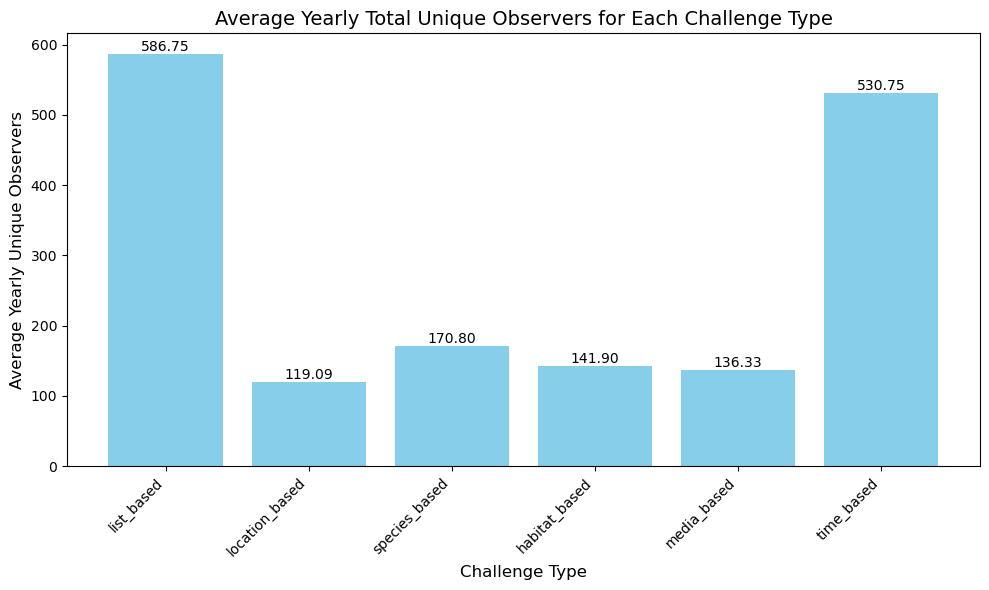

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the DataFrame exists
if "people_date" in locals() or "people_date" in globals():
    # List of challenge types
    challenge_types = ["list_based", "location_based", "species_based", "habitat_based", "media_based", "time_based"]

    # Dictionary to store average yearly unique observers for each challenge type
    avg_yearly_unique_observers = {}

    for challenge_type in challenge_types:
        # Filter rows where the challenge type is participated (value = 1)
        participants = people_date[people_date[challenge_type] == 1]

        # Group by year and count unique names
        yearly_unique_counts = participants.groupby("year")["name"].nunique()

        # Calculate the average yearly unique observers
        avg_yearly_unique_observers[challenge_type] = yearly_unique_counts.mean()

    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    bars = plt.bar(avg_yearly_unique_observers.keys(), avg_yearly_unique_observers.values(), color="skyblue")

    # Add labels and title
    plt.title("Average Yearly Total Unique Observers for Each Challenge Type", fontsize=14)
    plt.xlabel("Challenge Type", fontsize=12)
    plt.ylabel("Average Yearly Unique Observers", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

    # Add values on top of the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}", ha="center", va="bottom", fontsize=10)

    # Show the plot
    plt.show()
else:
    print("DataFrame 'people_date' does not exist.")

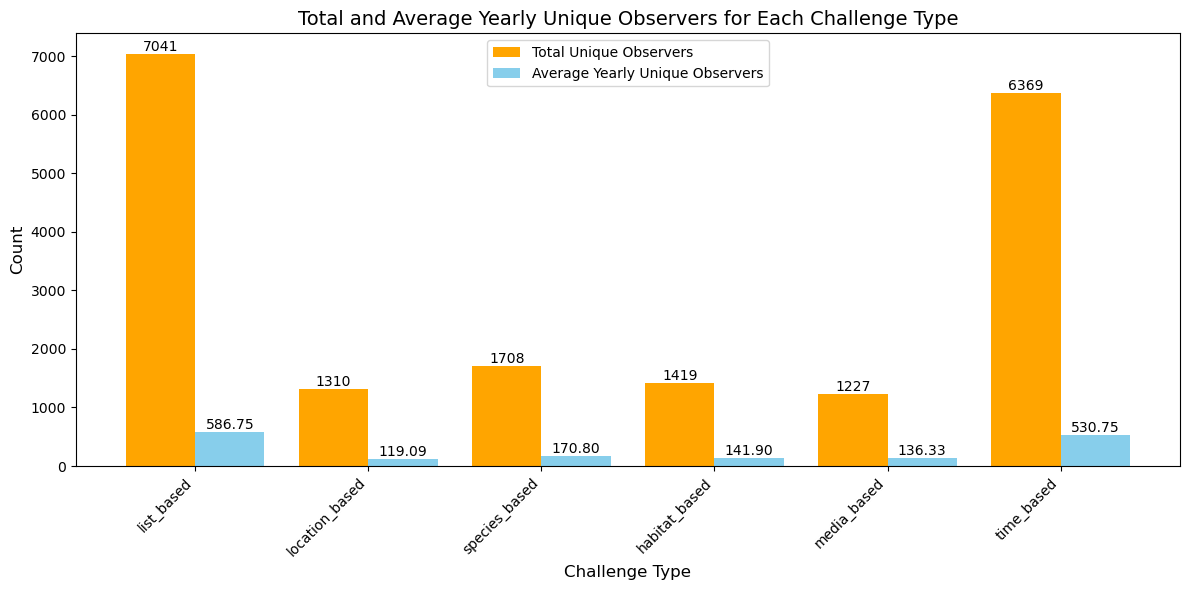

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the DataFrame exists
if "people_date" in locals() or "people_date" in globals():
    # List of challenge types
    challenge_types = ["list_based", "location_based", "species_based", "habitat_based", "media_based", "time_based"]

    # Dictionaries to store total and average yearly unique observers for each challenge type
    total_unique_observers = {}
    avg_yearly_unique_observers = {}

    for challenge_type in challenge_types:
        # Filter rows where the challenge type is participated (value = 1)
        participants = people_date[people_date[challenge_type] == 1]

        # Group by year and count unique names
        yearly_unique_counts = participants.groupby("year")["name"].nunique()

        # Calculate the total and average yearly unique observers
        total_unique_observers[challenge_type] = yearly_unique_counts.sum()
        avg_yearly_unique_observers[challenge_type] = yearly_unique_counts.mean()

    # Plot the double bar graph
    x = range(len(challenge_types))  # X-axis positions
    bar_width = 0.4  # Width of each bar

    plt.figure(figsize=(12, 6))

    # Plot total unique observers
    plt.bar(
        [pos - bar_width / 2 for pos in x],
        total_unique_observers.values(),
        width=bar_width,
        color="orange",
        label="Total Unique Observers"
    )

    # Plot average yearly unique observers
    plt.bar(
        [pos + bar_width / 2 for pos in x],
        avg_yearly_unique_observers.values(),
        width=bar_width,
        color="skyblue",
        label="Average Yearly Unique Observers"
    )

    # Add labels and title
    plt.title("Total and Average Yearly Unique Observers for Each Challenge Type", fontsize=14)
    plt.xlabel("Challenge Type", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(x, challenge_types, rotation=45, ha="right")
    plt.legend()
    plt.tight_layout()

    # Add values on top of the bars
    for i, (total, avg) in enumerate(zip(total_unique_observers.values(), avg_yearly_unique_observers.values())):
        plt.text(i - bar_width / 2, total + 1, f"{total:.0f}", ha="center", va="bottom", fontsize=10)
        plt.text(i + bar_width / 2, avg + 1, f"{avg:.2f}", ha="center", va="bottom", fontsize=10)

    # Show the plot
    plt.show()
else:
    print("DataFrame 'people_date' does not exist.")

In [9]:
people_date

,name,month,year,tuple_frequency,list_based,location_based,species_based,habitat_based,media_based,time_based
0,Aidan & Savio Fonseca,April,2014,1,1.0,0.0,0.0,0.0,0.0,1.0
1,Anish Aravind,April,2014,1,1.0,0.0,0.0,0.0,0.0,1.0
2,Arya Vinod,April,2014,1,1.0,0.0,0.0,0.0,0.0,1.0
3,Bela Arora,April,2014,1,1.0,0.0,0.0,0.0,0.0,1.0
4,Dhananjai Mohan,April,2014,1,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
14555,Vaibhav Patil,April,2025,1,1.0,0.0,1.0,0.0,1.0,0.0
14556,Vijaya Lakshmi,April,2025,1,1.0,0.0,1.0,0.0,1.0,0.0
14557,Vikrant Prabhulkar,April,2025,1,1.0,0.0,1.0,0.0,1.0,0.0
14558,Vivek Kumar Patel,April,2025,1,1.0,0.0,1.0,0.0,1.0,0.0


In [10]:
print(people_date.head(3))

                    name  month  year  tuple_frequency  list_based  \
0  Aidan & Savio Fonseca  April  2014                1         1.0   
1          Anish Aravind  April  2014                1         1.0   
2             Arya Vinod  April  2014                1         1.0   

   location_based  species_based  habitat_based  media_based  time_based  
0             0.0            0.0            0.0          0.0         1.0  
1             0.0            0.0            0.0          0.0         1.0  
2             0.0            0.0            0.0          0.0         1.0  


In [11]:
import pandas as pd

# Group by year and calculate the number of unique names
unique_people_per_year = people_date.groupby("year")["name"].nunique().reset_index()

# Rename columns for clarity
unique_people_per_year.columns = ["year", "uni_freq"]

# Display the resulting table
print(unique_people_per_year)

    year  uni_freq
0   2014       436
1   2015      1747
2   2016      1055
3   2017       468
4   2018       356
5   2019       382
6   2020       244
7   2021       287
8   2022       397
9   2023       454
10  2024       955
11  2025       751


In [12]:
import pandas as pd

# Ensure the DataFrame exists
if "people_date" in locals() or "people_date" in globals():
    # Create a mapping of month names to numeric values
    month_mapping = {
        "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
        "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
    }

    # Convert month names to numeric values
    people_date["month"] = people_date["month"].map(month_mapping)

    # Group by month and year, and calculate frequency
    common_date_freq = people_date.groupby(["month", "year"]).size().reset_index(name="frequency")

    # Create a datetime column for easier plotting
    common_date_freq["date"] = pd.to_datetime(common_date_freq[["year", "month"]].assign(day=1))

    # Keep only the relevant columns
    common_date_freq = common_date_freq[["date", "frequency"]]

    common_date_freq = common_date_freq.sort_values(by="date")

    # Display the resulting table
    print(common_date_freq)
else:
    print("DataFrame 'people_date' does not exist.")

          date  frequency
33  2014-04-01         17
44  2014-05-01        166
55  2014-06-01        162
66  2014-07-01         36
76  2014-08-01         23
..         ...        ...
124 2024-12-01        227
10  2025-01-01        305
21  2025-02-01        430
32  2025-03-01        256
43  2025-04-01         82

[125 rows x 2 columns]


In [13]:
import pandas as pd

# Extract the year from the date column
common_date_freq["year"] = common_date_freq["date"].dt.year

# Group by year and sum the frequency
yearly_frequency = common_date_freq.groupby("year")["frequency"].sum().reset_index()

# Rename columns for clarity
yearly_frequency.columns = ["year", "frequency"]

# Display the resulting table
print(yearly_frequency)

    year  frequency
0   2014        710
1   2015       3385
2   2016       1694
3   2017        899
4   2018        802
5   2019        822
6   2020        450
7   2021        678
8   2022        916
9   2023       1071
10  2024       2060
11  2025       1073


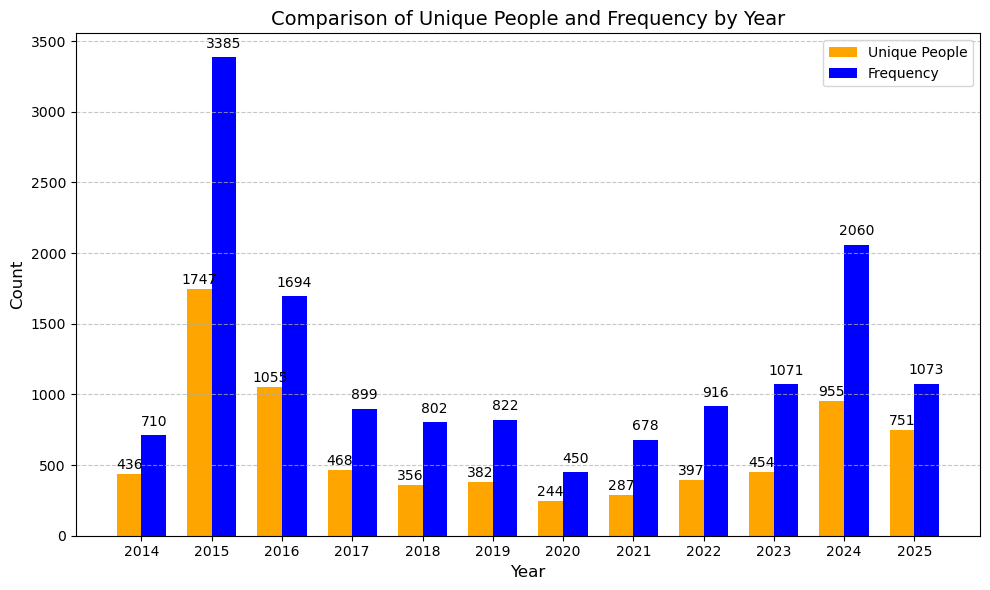

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the graph
years = unique_people_per_year["year"].tolist()  # From unique_people_per_year
unique_people = unique_people_per_year["uni_freq"].tolist()  # From unique_people_per_year
frequencies = yearly_frequency["frequency"].tolist()  # From yearly_frequency

# Ensure data is not empty
if not unique_people or not frequencies:
    raise ValueError("Data for 'unique_people' or 'frequencies' is empty.")

# X-axis positions for the bars
x = np.arange(len(years))

# Bar width
bar_width = 0.35

# Plot the double bar graph
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, unique_people, width=bar_width, color="orange", label="Unique People")
plt.bar(x + bar_width / 2, frequencies, width=bar_width, color="blue", label="Frequency")

# Add labels and title
plt.title("Comparison of Unique People and Frequency by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(x, years)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add gridlines for better readability

# Add value labels on top of the bars
for i, value in enumerate(unique_people):
    plt.text(i - bar_width / 2, value + max(unique_people) * 0.02, f"{value}", ha="center", fontsize=10)
for i, value in enumerate(frequencies):
    plt.text(i + bar_width / 2, value + max(frequencies) * 0.02, f"{value}", ha="center", fontsize=10)

# Show the plot
plt.tight_layout()

C:\Users\HP\AppData\Local\Temp\ipykernel_19804\302397276.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["year"] = filtered_data["date"].dt.year


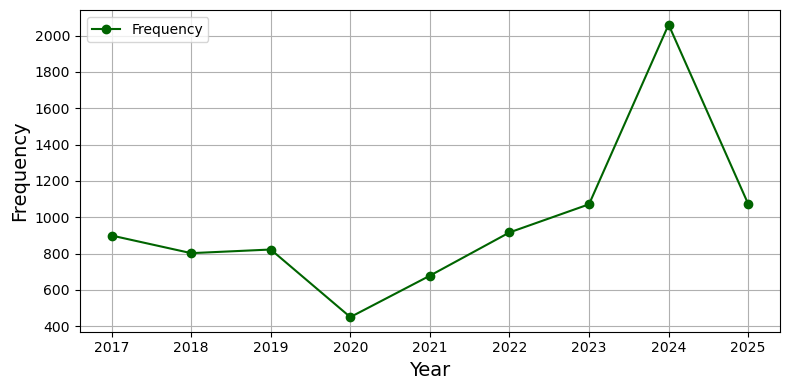

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the DataFrame exists
if "common_date_freq" in locals() or "common_date_freq" in globals():
    # Filter the data for years from 2027 to the present
    current_year = pd.Timestamp.now().year
    filtered_data = common_date_freq[common_date_freq["date"].dt.year >= 2017]

    # Extract the year from the date column
    filtered_data["year"] = filtered_data["date"].dt.year

    # Group by year and sum the frequency
    yearly_data = filtered_data.groupby("year")["frequency"].sum().reset_index()

    # Plot the line graph
    plt.figure(figsize=(8, 4))
    plt.plot(yearly_data["year"], yearly_data["frequency"], marker="o", color="darkgreen", label="Frequency")

    # Customize the plot
    # plt.title("Participation Frequency by Year (2027 to Present)", fontsize=28)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()

    # Show the plot
    plt.show()
else:
    print("DataFrame 'common_date_freq' does not exist.")

C:\Users\HP\AppData\Local\Temp\ipykernel_19804\2452845453.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["year"] = filtered_data["date"].dt.year
C:\Users\HP\AppData\Local\Temp\ipykernel_19804\2452845453.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["month"] = filtered_data["date"].dt.month


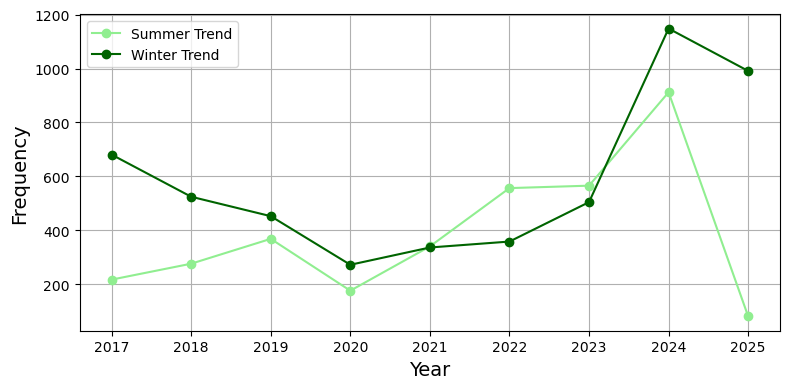

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the DataFrame exists
if "common_date_freq" in locals() or "common_date_freq" in globals():
    # Define summer and winter months
    summer_months = [4, 5, 6, 7, 8, 9]
    winter_months = [10, 11, 12, 1, 2, 3]

    # Filter the data for years from 2017 to the present
    filtered_data = common_date_freq[common_date_freq["date"].dt.year >= 2017]

    # Extract the year and month from the date column
    filtered_data["year"] = filtered_data["date"].dt.year
    filtered_data["month"] = filtered_data["date"].dt.month

    # Separate data into summer and winter
    summer_data = filtered_data[filtered_data["month"].isin(summer_months)]
    winter_data = filtered_data[filtered_data["month"].isin(winter_months)]

    # Group by year and sum the frequency for summer and winter
    summer_yearly_data = summer_data.groupby("year")["frequency"].sum().reset_index()
    winter_yearly_data = winter_data.groupby("year")["frequency"].sum().reset_index()

    # Plot the double line graph
    plt.figure(figsize=(8, 4))
    plt.plot(
        summer_yearly_data["year"],
        summer_yearly_data["frequency"],
        marker="o",
        color="lightgreen",
        label="Summer Trend"
    )
    plt.plot(
        winter_yearly_data["year"],
        winter_yearly_data["frequency"],
        marker="o",
        color="darkgreen",
        label="Winter Trend"
    )

    # Customize the plot
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    # plt.title("Participation Frequency by Year (Summer vs Winter)", fontsize=16)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("DataFrame 'common_date_freq' does not exist.")

In [17]:
common_date_freq

,date,frequency,year
33,2014-04-01,17,2014
44,2014-05-01,166,2014
55,2014-06-01,162,2014
66,2014-07-01,36,2014
76,2014-08-01,23,2014
...,...,...,...
124,2024-12-01,227,2024
10,2025-01-01,305,2025
21,2025-02-01,430,2025
32,2025-03-01,256,2025


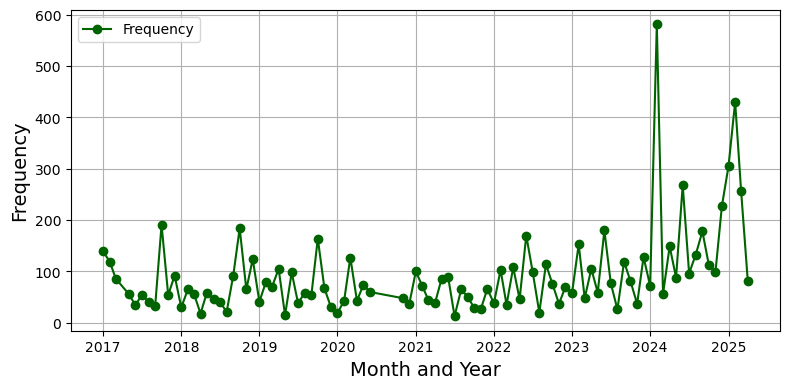

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the DataFrame exists
if "common_date_freq" in locals() or "common_date_freq" in globals():
    # Filter the data for dates from 2017 to the present
    filtered_data = common_date_freq[common_date_freq["date"].dt.year >= 2017]

    # Plot the line graph
    plt.figure(figsize=(8, 4))
    plt.plot(filtered_data["date"], filtered_data["frequency"], marker="o", color="darkgreen", label="Frequency")

    # Customize the plot
    # plt.title("Participation Frequency Over Time (2017 to Present)", fontsize=14)
    plt.xlabel("Month and Year", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()

    # Show the plot
    plt.show()
else:
    print("DataFrame 'common_date_freq' does not exist.")

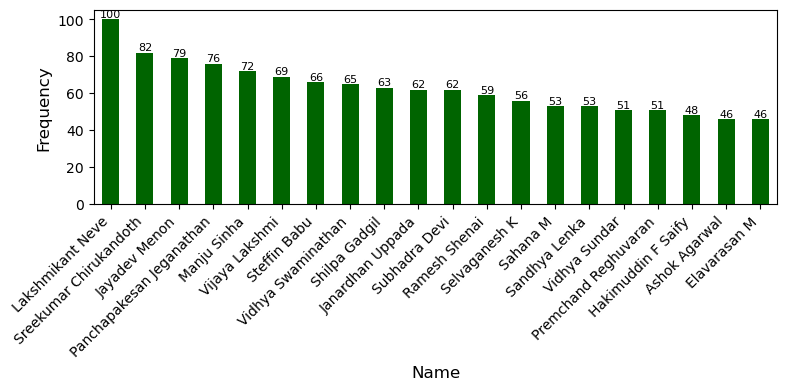

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the DataFrame exists
if "people_date" in locals() or "people_date" in globals():
    # Count the frequency of each name
    name_counts = people_date["name"].value_counts()

    # Get the top 20 names
    top_20_names = name_counts.head(20)

    # Plot the graph
    plt.figure(figsize=(8, 4))
    bars = top_20_names.plot(kind="bar", color="darkgreen")
    # plt.title("Top 20 Birders by Frequency of Appearance", fontsize=14)
    plt.xlabel("Name", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

    # Add frequency numbers on top of each bar
    for bar in bars.patches:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            str(int(bar.get_height())),
            ha="center",
            va="bottom",
            fontsize=8
        )

    plt.show()
else:
    print("DataFrame 'people_date' does not exist.")

In [20]:
import pandas as pd

# Ensure the DataFrame exists
if "people_date" in locals() or "people_date" in globals():
    # Create tables for each type along with month and year
    types = ["list_based", "location_based", "species_based", "habitat_based", "media_based", "time_based"]
    tables = {}

    for challenge_type in types:
        # Filter for participants in the current challenge type (value = 1)
        participants = people_date[people_date[challenge_type] == 1]
        counts = participants.groupby(["name", "month", "year"]).size().reset_index()
        tables[challenge_type] = counts  # Directly assign the grouped DataFrame without dropping columns

    # Display the tables
    for challenge_type, table in tables.items():
        print(f"Table for {challenge_type}:")
        print(table)
        print("\n")
else:
    print("DataFrame 'people_date' does not exist.")

Table for list_based:
                           name  month  year  0
0      10000Birds Yearlist 2016      6  2016  1
1                         A. S.      6  2016  1
2                         A. S.      7  2016  1
3                 AAKIB HUSSAIN      3  2020  1
4                 AAKIB HUSSAIN      4  2019  1
...                         ...    ...   ... ..
13317               vrinda lath     11  2018  1
13318               yogendra hs      6  2016  1
13319           yokesh bharathi      6  2016  1
13320        yudhajit talapatra     10  2015  1
13321          zakaria yusufzai     10  2015  1

[13322 rows x 4 columns]


Table for location_based:
                 name  month  year  0
0       AAKIB HUSSAIN      3  2020  1
1          ADIL NAFAR     11  2018  1
2             AM AMSA      3  2020  1
3             AM AMSA      8  2019  1
4             AM Amsa      3  2016  1
...               ...    ...   ... ..
1554  vadivukkarasi A      8  2019  1
1555     vedang saunt      6  2014  1
1556  

In [21]:
import pandas as pd

# Ensure the DataFrame exists
if "people_date" in locals() or "people_date" in globals():
    # Create tables for each type along with month and year
    types = ["list_based", "location_based", "species_based", "habitat_based", "media_based", "time_based"]
    tables = {}
    frequency_tables = {}

    for challenge_type in types:
        # Filter for participants in the current challenge type (value = 1)
        participants = people_date[people_date[challenge_type] == 1]
        counts = participants.groupby(["name", "month", "year"]).size().reset_index()
        tables[challenge_type] = counts  # Original table with name, month, year

        # Create frequency table for the current challenge type
        frequency_counts = participants["name"].value_counts().reset_index()
        frequency_counts.columns = ["name", "frequency"]
        frequency_tables[challenge_type] = frequency_counts  # New table with name, frequency

    # Display the frequency tables
    for challenge_type, freq_table in frequency_tables.items():
        print(f"Frequency Table for {challenge_type}:")
        print(freq_table)
        print("\n")
else:
    print("DataFrame 'people_date' does not exist.")

Frequency Table for list_based:
                          name  frequency
0             Lakshmikant Neve         95
1       Sreekumar Chirukandoth         76
2                Jayadev Menon         74
3     Panchapakesan Jeganathan         74
4                  Manju Sinha         70
...                        ...        ...
4191              avijit dutta          1
4192        AWC Pathanamthitta          1
4193          Babasaheb Jawale          1
4194         Balaji Rangachari          1
4195               Trivedi Gvn          1

[4196 rows x 2 columns]


Frequency Table for location_based:
                       name  frequency
0          Lakshmikant Neve         21
1    Sreekumar Chirukandoth         19
2              Steffin Babu         17
3          Janardhan Uppada         15
4             Jayadev Menon         14
..                      ...        ...
879            Adithya Bhat          1
880           Shilky Sharma          1
881        Adharsh Bharathi          1
882        

In [22]:
import pandas as pd

# Ensure the DataFrame exists
if "people_date" in locals() or "people_date" in globals():
    # Create tables for each type along with month and year
    types = ["list_based", "location_based", "species_based", "habitat_based", "media_based", "time_based"]
    tables = {}
    frequency_tables = {}

    for challenge_type in types:
        # Filter for participants in the current challenge type (value = 1)
        participants = people_date[people_date[challenge_type] == 1]
        counts = participants.groupby(["name", "month", "year"]).size().reset_index()
        tables[challenge_type] = counts  # Original table with name, month, year

        # Create frequency table for the current challenge type
        frequency_counts = participants["name"].value_counts().reset_index()
        frequency_counts.columns = ["name", "frequency"]
        frequency_tables[challenge_type] = frequency_counts.head(20)  # Top 20 names

    # Find common names across all top 20 frequency tables
    top_20_names_sets = [set(freq_table["name"]) for freq_table in frequency_tables.values()]
    common_names = set.intersection(*top_20_names_sets)

    # Display the common names
    print("Common names in the top 20 of each challenge type:")
    print(common_names)
else:
    print("DataFrame 'people_date' does not exist.")

Common names in the top 20 of each challenge type:
{'Lakshmikant Neve', 'Vijaya Lakshmi', 'Sreekumar Chirukandoth', 'Vidhya Swaminathan', 'Ramesh Shenai', 'Steffin Babu', 'Jayadev Menon', 'Sahana M', 'Janardhan Uppada'}


In [23]:
people_date


,name,month,year,tuple_frequency,list_based,location_based,species_based,habitat_based,media_based,time_based
0,Aidan & Savio Fonseca,4,2014,1,1.0,0.0,0.0,0.0,0.0,1.0
1,Anish Aravind,4,2014,1,1.0,0.0,0.0,0.0,0.0,1.0
2,Arya Vinod,4,2014,1,1.0,0.0,0.0,0.0,0.0,1.0
3,Bela Arora,4,2014,1,1.0,0.0,0.0,0.0,0.0,1.0
4,Dhananjai Mohan,4,2014,1,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
14555,Vaibhav Patil,4,2025,1,1.0,0.0,1.0,0.0,1.0,0.0
14556,Vijaya Lakshmi,4,2025,1,1.0,0.0,1.0,0.0,1.0,0.0
14557,Vikrant Prabhulkar,4,2025,1,1.0,0.0,1.0,0.0,1.0,0.0
14558,Vivek Kumar Patel,4,2025,1,1.0,0.0,1.0,0.0,1.0,0.0


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the DataFrame exists
if "people_date" in locals() or "people_date" in globals():
    # Create tables for each type along with date and count
    types = ["list_based", "location_based", "species_based", "habitat_based", "media_based", "time_based"]
    grouped_tables = {}

    for challenge_type in types:
        # Filter for participants in the current challenge type (value = 1)
        participants = people_date[people_date[challenge_type] == 1]
        participants["month"] = participants["month"]
        counts = participants.groupby(["month", "year"]).size().reset_index(name="count")
        counts["date"] = pd.to_datetime(counts[["year", "month"]].assign(day=1))  # Create a datetime column
        sorted_counts = counts.sort_values(by="date")  # Sort by date in ascending order
        grouped_tables[challenge_type] = sorted_counts[["date", "count"]]  # Keep only date and count columns

    # Display the sorted grouped tables
    for challenge_type, table in grouped_tables.items():
        print(f"Sorted Grouped Table for {challenge_type}:")
        print(table)
        print("\n")
else:
    print("DataFrame 'people_date' does not exist.")

Sorted Grouped Table for list_based:
          date  count
33  2014-04-01     17
41  2014-05-01    166
51  2014-06-01    162
62  2014-07-01     36
72  2014-08-01     23
..         ...    ...
118 2024-12-01    227
10  2025-01-01    305
21  2025-02-01    430
32  2025-03-01    256
40  2025-04-01     82

[119 rows x 2 columns]


Sorted Grouped Table for location_based:
         date  count
16 2014-06-01    162
23 2014-11-01     18
17 2015-06-01     25
24 2015-11-01     45
0  2016-01-01     14
6  2016-03-01     62
12 2016-04-01      9
15 2017-05-01     56
20 2017-08-01     41
25 2017-11-01     54
1  2018-01-01     30
13 2018-04-01     18
21 2018-08-01     21
26 2018-11-01     65
2  2019-01-01     41
22 2019-08-01     59
3  2020-01-01     19
7  2020-03-01    127
14 2020-04-01     43
4  2021-01-01    100
8  2021-03-01     44
18 2021-06-01     89
19 2021-07-01     13
5  2022-01-01     38
9  2022-03-01     35
10 2023-03-01     48
11 2024-03-01     56
27 2024-12-01    227


Sorted Grouped Table 

C:\Users\HP\AppData\Local\Temp\ipykernel_19804\1011310549.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participants["month"] = participants["month"]
C:\Users\HP\AppData\Local\Temp\ipykernel_19804\1011310549.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participants["month"] = participants["month"]
C:\Users\HP\AppData\Local\Temp\ipykernel_19804\1011310549.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

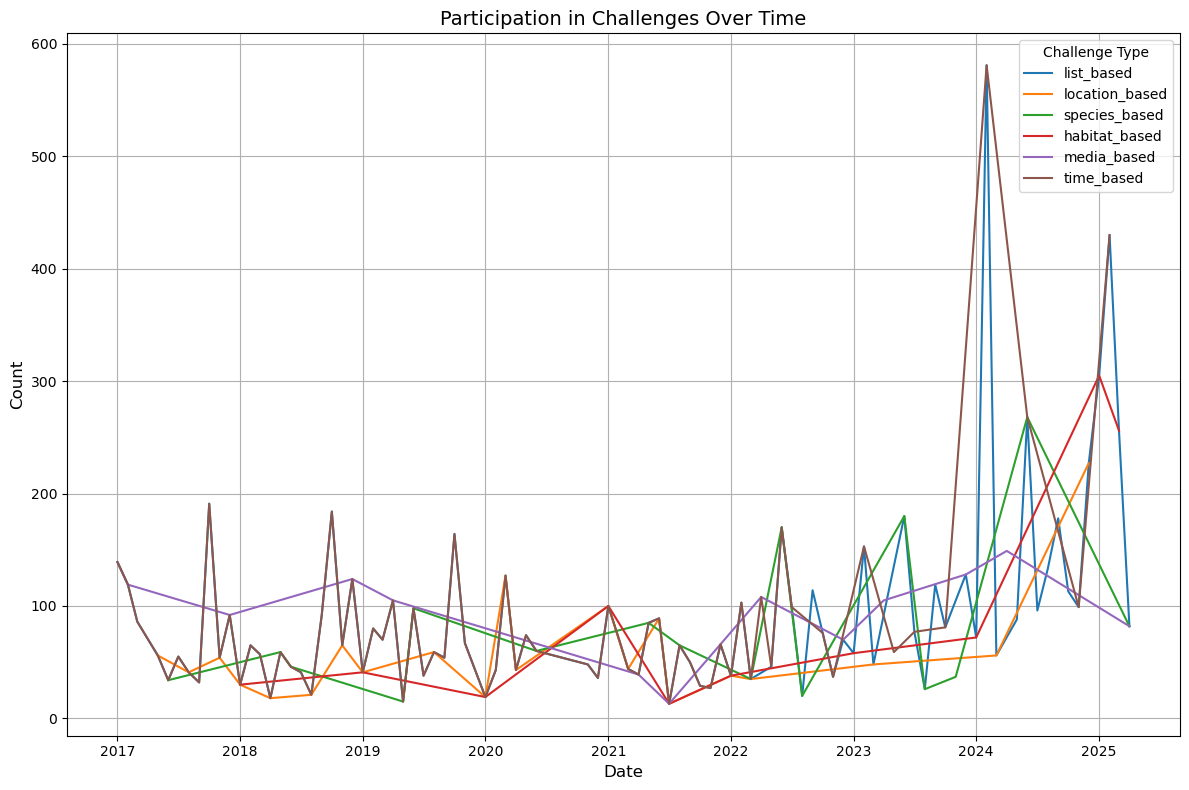

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the DataFrame exists
if "grouped_tables" in locals() or "grouped_tables" in globals():
    # Plot the time series for each challenge type
    plt.figure(figsize=(12, 8))

    for challenge_type, table in grouped_tables.items():
        table = table[table["date"].dt.year >= 2017]
        plt.plot(table["date"], table["count"], label=challenge_type)

    # Customize the plot
    plt.title("Participation in Challenges Over Time", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(title="Challenge Type")
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("Grouped tables do not exist.")

C:\Users\HP\AppData\Local\Temp\ipykernel_19804\2640177237.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table["smoothed_count"] = table["count"].rolling(window=3, min_periods=1).mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_19804\2640177237.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table["smoothed_count"] = table["count"].rolling(window=3, min_periods=1).mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_19804\2640177237.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy 

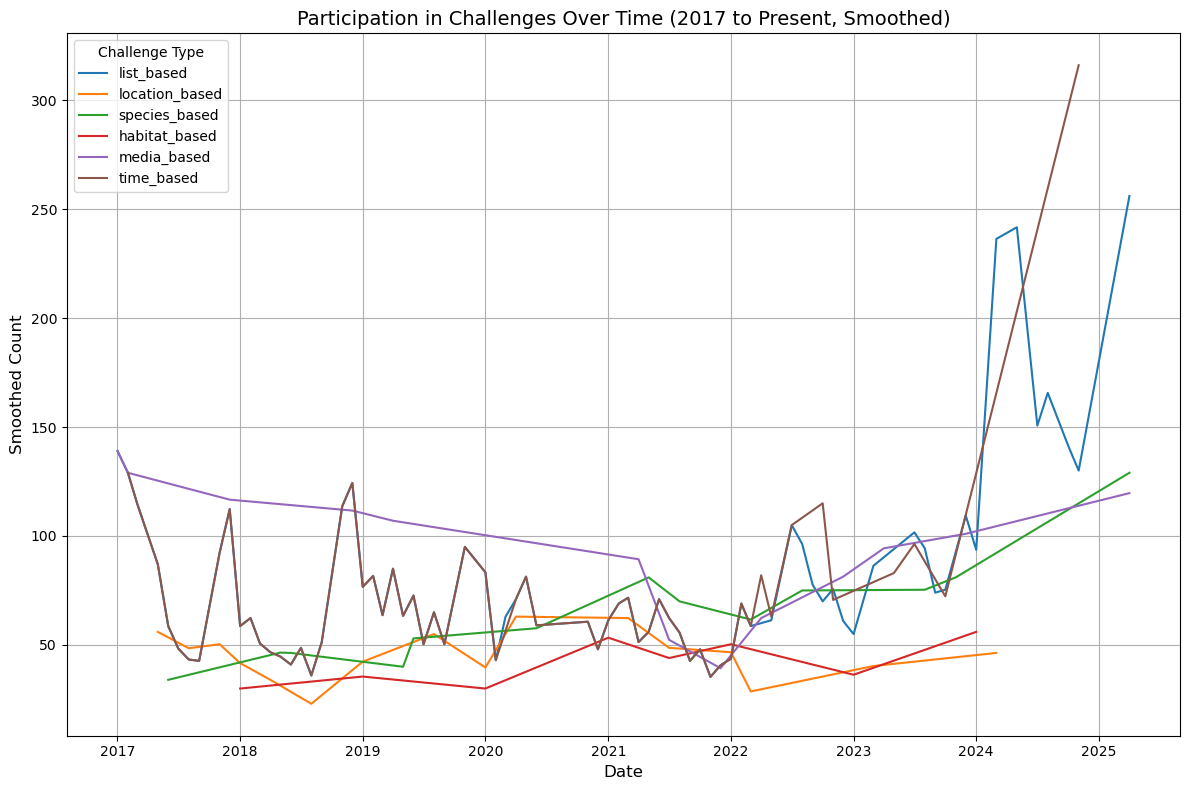

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the DataFrame exists
if "grouped_tables" in locals() or "grouped_tables" in globals():
    # Plot the time series for each challenge type
    plt.figure(figsize=(12, 8))
    for challenge_type, table in grouped_tables.items():
        # Filter data for dates from 2017 to the present
        table = table[table["date"].dt.year >= 2017]

        # Apply rolling average for smoothing
        table["smoothed_count"] = table["count"].rolling(window=3, min_periods=1).mean()

        # Filter out outliers (e.g., counts greater than 1.5 times the rolling average)
        threshold = 1.5 * table["smoothed_count"].mean()
        table_filtered = table[table["count"] <= threshold]

        # Plot the smoothed and filtered data
        plt.plot(table_filtered["date"], table_filtered["smoothed_count"], label=challenge_type)

    # Customize the plot
    plt.title("Participation in Challenges Over Time (2017 to Present, Smoothed)", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Smoothed Count", fontsize=12)
    plt.legend(title="Challenge Type")
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("Grouped tables do not exist.")

C:\Users\HP\AppData\Local\Temp\ipykernel_19804\398077931.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participants["month"] = participants["month"]
C:\Users\HP\AppData\Local\Temp\ipykernel_19804\398077931.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participants["month"] = participants["month"]
C:\Users\HP\AppData\Local\Temp\ipykernel_19804\398077931.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

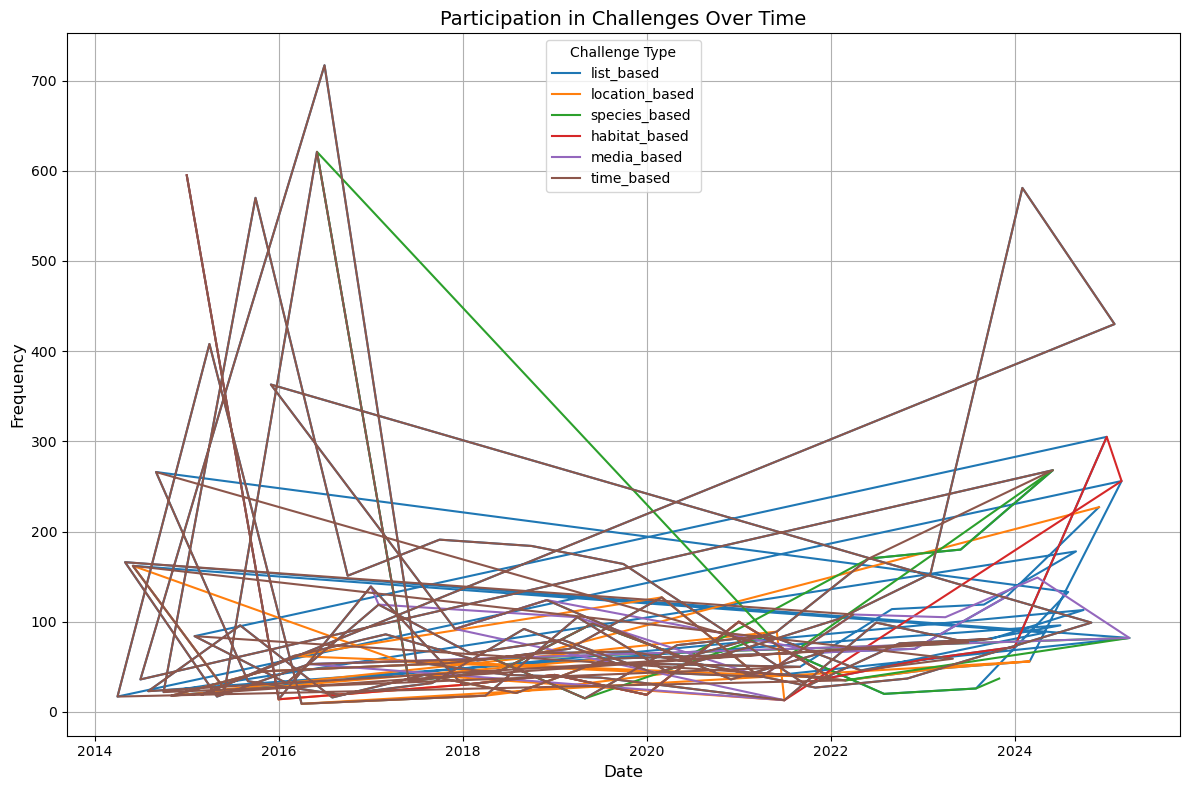

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the DataFrame exists
if "people_date" in locals() or "people_date" in globals():
    # Create tables for each type along with month and year
    types = ["list_based", "location_based", "species_based", "habitat_based", "media_based", "time_based"]
    tables = {}

    for challenge_type in types:
        # Filter for participants in the current challenge type (value = 1)
        participants = people_date[people_date[challenge_type] == 1]
        participants["month"] = participants["month"]
        counts = participants.groupby(["month", "year"]).size().reset_index(name="frequency")
        counts["date"] = pd.to_datetime(counts[["year", "month"]].assign(day=1))  # Create a datetime column
        tables[challenge_type] = counts

    # Plot the time series for each challenge type
    plt.figure(figsize=(12, 8))
    for challenge_type, table in tables.items():
        plt.plot(table["date"], table["frequency"], label=challenge_type)

    # Customize the plot
    plt.title("Participation in Challenges Over Time", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend(title="Challenge Type")
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("DataFrame 'people_date' does not exist.")

In [28]:
people_date

,name,month,year,tuple_frequency,list_based,location_based,species_based,habitat_based,media_based,time_based
0,Aidan & Savio Fonseca,4,2014,1,1.0,0.0,0.0,0.0,0.0,1.0
1,Anish Aravind,4,2014,1,1.0,0.0,0.0,0.0,0.0,1.0
2,Arya Vinod,4,2014,1,1.0,0.0,0.0,0.0,0.0,1.0
3,Bela Arora,4,2014,1,1.0,0.0,0.0,0.0,0.0,1.0
4,Dhananjai Mohan,4,2014,1,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
14555,Vaibhav Patil,4,2025,1,1.0,0.0,1.0,0.0,1.0,0.0
14556,Vijaya Lakshmi,4,2025,1,1.0,0.0,1.0,0.0,1.0,0.0
14557,Vikrant Prabhulkar,4,2025,1,1.0,0.0,1.0,0.0,1.0,0.0
14558,Vivek Kumar Patel,4,2025,1,1.0,0.0,1.0,0.0,1.0,0.0


In [29]:
# Ensure the DataFrame exists
if "people_date" in locals() or "people_date" in globals():
    # Select only the required columns
    people_date_only = people_date[["name", "month", "year", "tuple_frequency"]]
    
    # Display the new DataFrame
    print(people_date_only)
else:
    print("DataFrame 'people_date' does not exist.")

                        name  month  year  tuple_frequency
0      Aidan & Savio Fonseca      4  2014                1
1              Anish Aravind      4  2014                1
2                 Arya Vinod      4  2014                1
3                 Bela Arora      4  2014                1
4            Dhananjai Mohan      4  2014                1
...                      ...    ...   ...              ...
14555          Vaibhav Patil      4  2025                1
14556         Vijaya Lakshmi      4  2025                1
14557     Vikrant Prabhulkar      4  2025                1
14558      Vivek Kumar Patel      4  2025                1
14559       Vivek Sudhakaran      4  2025                1

[14560 rows x 4 columns]


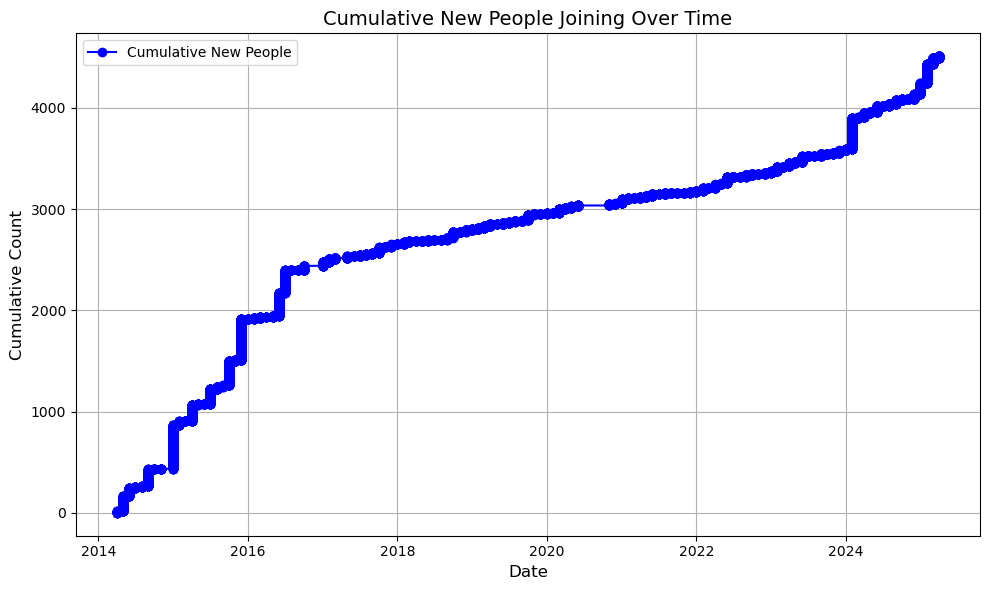

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    "name": people_date_only["name"].tolist(),
    "month": people_date_only["month"].tolist(),
    "year": people_date_only["year"].tolist(),
    "tuple_frequency": people_date_only["tuple_frequency"].tolist()
}
people_date_only = pd.DataFrame(data)

# Sort the DataFrame by year and month
people_date_only = people_date_only.sort_values(by=["year", "month"])

# Create a column to track cumulative unique names
people_date_only["is_new"] = ~people_date_only["name"].duplicated()
people_date_only["cumulative_new"] = people_date_only["is_new"].cumsum()

# Create a datetime column for plotting
people_date_only["date"] = pd.to_datetime(people_date_only[["year", "month"]].assign(day=1))

# Plot the cumulative graph
plt.figure(figsize=(10, 6))
plt.plot(people_date_only["date"], people_date_only["cumulative_new"], marker="o", color="blue", label="Cumulative New People")

# Customize the plot
plt.title("Cumulative New People Joining Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Count", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.legend()

#

In [31]:
import pandas as pd

# Ensure the DataFrame exists
if "people_date" in locals() or "people_date" in globals():
    # Group by name and year to check participation
    participation = people_date.groupby(["name", "year"]).size().reset_index(name="count")

    # Create a pivot table where rows are names and columns are years
    participation_pivot = participation.pivot(index="name", columns="year", values="count").fillna(0)

    # Identify participants consistent since 2014
    consistent_since_2014 = participation_pivot.loc[(participation_pivot.loc[:, 2014:].sum(axis=1) > 0) & (participation_pivot.loc[:, 2014:].all(axis=1))]

    # Identify participants consistent since 2020
    consistent_since_2020 = participation_pivot.loc[(participation_pivot.loc[:, 2020:].sum(axis=1) > 0) & (participation_pivot.loc[:, 2020:].all(axis=1))]

    # Identify participants consistent from 2014 to 2020 but no submissions after 2020
    consistent_2014_to_2020_no_after = participation_pivot.loc[
        (participation_pivot.loc[:, 2014:2020].all(axis=1)) & (participation_pivot.loc[:, 2021:].sum(axis=1) == 0)
    ]

    # Display results
    print("Consistent since 2014:")
    print(consistent_since_2014.index.tolist())

    print("\nConsistent since 2020:")
    print(consistent_since_2020.index.tolist())

    print("\nConsistent from 2014 to 2020 but no submissions after 2020:")
    print(consistent_2014_to_2020_no_after.index.tolist())
else:
    print("DataFrame 'people_date' does not exist.")

Consistent since 2014:
['Manju Sinha', 'Panchapakesan Jeganathan', 'Selvaganesh K']

Consistent since 2020:
['Ajay Sarvagnam', 'Ashok Agarwal', 'Bijoy Venugopal', 'Dhruba Saikia', 'Dr Mohammed Umer Sharieff', 'Elavarasan M', 'Garima Bhatia', 'Hakimuddin F Saify', 'Jageshwer Verma', 'Janardhan Uppada', 'Jayadev Menon', 'Krishnamoorthy Muthirulan', 'Lakshmikant Neve', 'Madhu Gupta', 'Malyasri Bhattacharya', 'Manju Sinha', 'Mehala Kumar', 'Mohit Sahu', 'Moovendan Ramalingam', 'Nishad Eshaal', 'Nosherwan Sethna', 'Panchapakesan Jeganathan', 'Prabhudatta Bal', 'Rajesh Radhakrishnan', 'Ramesh Shenai', 'Sahana M', 'Sakthi Chinnakannu', 'Sandhya Lenka', 'Sanjiv Khanna', 'Sarabjeet Kaur', 'Selvaganesh K', 'Shashikiran Ganesh', 'Shilpa Gadgil', 'Shyamkumar Puravankara', 'Sreekumar Chirukandoth', 'Steffin Babu', 'Subhadra Devi', 'Vidhya Swaminathan', 'Vijaya Lakshmi']

Consistent from 2014 to 2020 but no submissions after 2020:
['Suhel Quader']


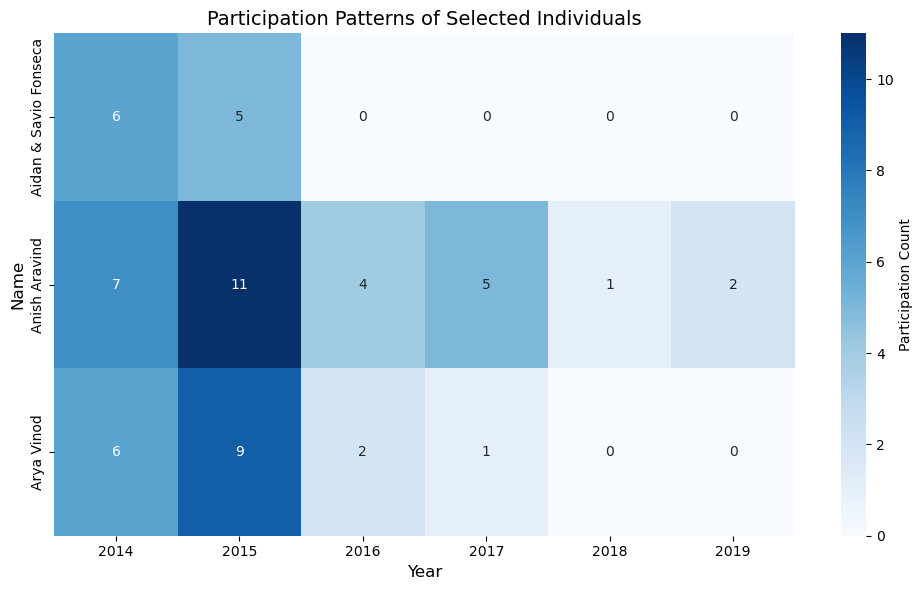

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the DataFrame exists
if "people_date" in locals() or "people_date" in globals():
    # Group by name and year to check participation
    participation = people_date.groupby(["name", "year"]).size().reset_index(name="count")

    # Filter for specific individuals (replace with names of interest)
    specific_people = ["Aidan & Savio Fonseca", "Anish Aravind", "Arya Vinod"]
    filtered_data = participation[participation["name"].isin(specific_people)]

    # Pivot the data to create a heatmap-friendly format
    heatmap_data = filtered_data.pivot(index="name", columns="year", values="count").fillna(0)

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Blues", cbar_kws={"label": "Participation Count"})
    plt.title("Participation Patterns of Selected Individuals", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Name", fontsize=12)
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("DataFrame 'people_date' does not exist.")

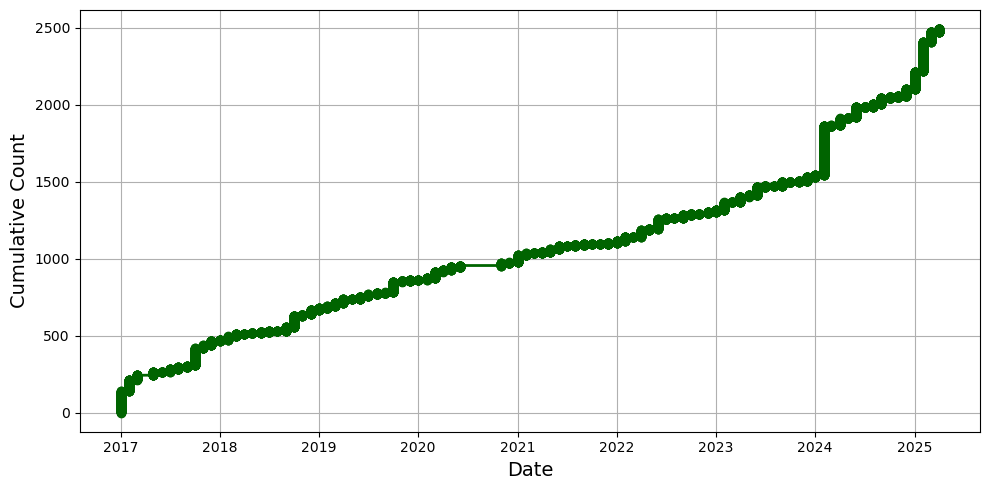

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    "name": people_date_only['name'],
    "month": people_date_only['month'],
    "year": people_date_only['year'],
    "tuple_frequency": people_date_only['tuple_frequency']
}
df = pd.DataFrame(data)

df = df[df["year"] >= 2017]

# Sort the DataFrame by year and month
df = df.sort_values(by=["year", "month"])

# Create a column to track cumulative unique names
df["is_new"] = ~df["name"].duplicated()
df["cumulative_new"] = df["is_new"].cumsum()

# Create a datetime column for plotting
df["date"] = pd.to_datetime(df[["year", "month"]].assign(day=1))

# Plot the cumulative graph
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["cumulative_new"], marker="o", color="darkgreen", label="Cumulative New People", linewidth=2)

# Customize the plot
# plt.title("Cumulative New People Joining Over Time", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Cumulative Count", fontsize=14)
plt.grid(True)
plt.tight_layout()
# plt.legend()

# Show the plot
plt.show()

Total number of unique participants in summer: 1129
Total number of unique participants in winter: 2041


C:\Users\HP\AppData\Local\Temp\ipykernel_19804\386604444.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Greens")


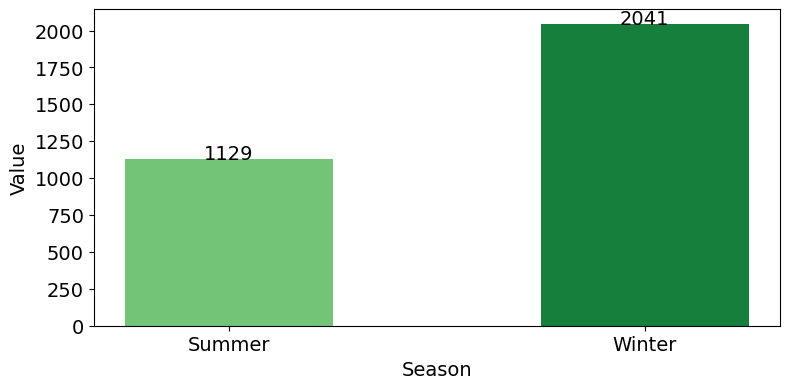

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Ensure the DataFrame exists
if "people_date_only" in locals() or "people_date_only" in globals():
    # Define summer and winter months
    summer_months = [4, 5, 6, 7, 8, 9]
    winter_months = [10, 11, 12, 1, 2, 3]

    # Filter data for 2017 and later
    filtered_data = people_date_only[people_date_only["year"] >= 2017]

    # Filter data for summer and winter
    summer_data = filtered_data[filtered_data["month"].isin(summer_months)]
    winter_data = filtered_data[filtered_data["month"].isin(winter_months)]

    # Calculate the total number of unique participants for summer and winter
    total_unique_summer = summer_data["name"].nunique()
    total_unique_winter = winter_data["name"].nunique()

    # Display the results
    print(f"Total number of unique participants in summer: {total_unique_summer}")
    print(f"Total number of unique participants in winter: {total_unique_winter}")
else:
    print("DataFrame 'people_date_only' does not exist.")



# Data for the bar graph
seasons = ["Summer", "Winter"]
values = [total_unique_summer, total_unique_winter]  # Replace with your actual values

# X-axis positions for the bars
x = np.arange(len(seasons))

# Bar width
bar_width = 0.5

# Use the "Greens" colormap
cmap = cm.get_cmap("Greens")
colors = cmap(np.linspace(0.5, 0.8, len(values)))

# Plot the bar graph
plt.figure(figsize=(8, 4))
plt.bar(x, values, width=bar_width, color=colors, label="Participants")

# Add labels and title
plt.xlabel("Season", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(x, seasons, fontsize=14)
plt.yticks(fontsize=14)

# Add value labels on top of the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.5, f"{value:.0f}", ha="center", fontsize=14)

# Show the plot
plt.tight_layout()

Average number of unique participants in summer: 210.11111111111111
Average number of unique participants in winter: 378.77777777777777


C:\Users\HP\AppData\Local\Temp\ipykernel_19804\2682031459.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Greens")


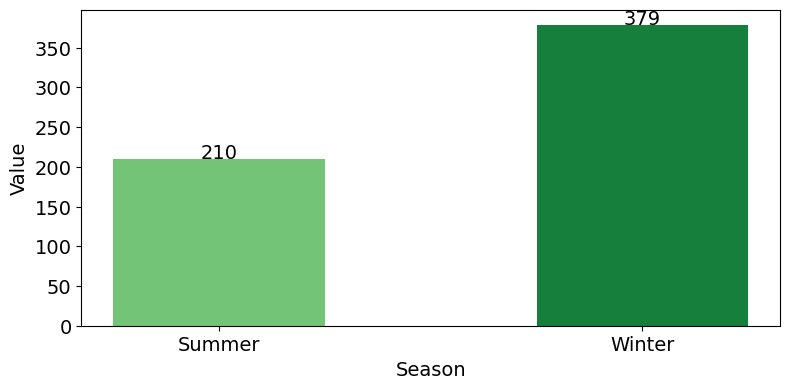

In [35]:
import pandas as pd

# Ensure the DataFrame exists
if "people_date_only" in locals() or "people_date_only" in globals():
    # Define summer and winter months
    summer_months = [4, 5, 6, 7, 8, 9]
    winter_months = [10, 11, 12, 1, 2, 3]

     # Filter data for 2017 and later
    filtered_data = filtered_data[filtered_data["year"] >= 2017]

    # Filter data for summer and winter
    summer_data = filtered_data[filtered_data["month"].isin(summer_months)]
    winter_data = filtered_data[filtered_data["month"].isin(winter_months)]

    # Calculate the number of unique participants for summer and winter by year
    unique_summer = summer_data.groupby("year")["name"].nunique()
    unique_winter = winter_data.groupby("year")["name"].nunique()

    # Calculate the average number of unique participants for summer and winter
    average_unique_summer = unique_summer.mean()
    average_unique_winter = unique_winter.mean()

    # Display the results
    print(f"Average number of unique participants in summer: {average_unique_summer}")
    print(f"Average number of unique participants in winter: {average_unique_winter}")
else:
    print("DataFrame 'people_date_only' does not exist.")


    
# Data for the bar graph
seasons = ["Summer", "Winter"]
values = [average_unique_summer, average_unique_winter]  # Replace with your actual values

# X-axis positions for the bars
x = np.arange(len(seasons))

# Bar width
bar_width = 0.5

# Use the "Greens" colormap
cmap = cm.get_cmap("Greens")
colors = cmap(np.linspace(0.5, 0.8, len(values)))

# Plot the bar graph
plt.figure(figsize=(8, 4))
plt.bar(x, values, width=bar_width, color=colors, label="Participants")

# Add labels and title
plt.xlabel("Season", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(x, seasons, fontsize=14)
plt.yticks(fontsize=14)

# Add value labels on top of the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.5, f"{value:.0f}", ha="center", fontsize=14)

# Show the plot
plt.tight_layout()

The average is being calculated as follows:

1. **Filter Data by Year (2017 and Later)**:
   - The `filtered_data` DataFrame is created by selecting rows where the `year` is greater than or equal to 2017.

2. **Filter Data by Seasons**:
   - `summer_data`: Rows where the `month` is in the `summer_months` list `[4, 5, 6, 7, 8, 9]`.
   - `winter_data`: Rows where the `month` is in the `winter_months` list `[10, 11, 12, 1, 2, 3]`.

3. **Group by Year and Count Unique Participants**:
   - `unique_summer`: Groups `summer_data` by `year` and counts the number of unique `name` values for each year.
   - `unique_winter`: Groups `winter_data` by `year` and counts the number of unique `name` values for each year.

4. **Calculate the Average**:
   - `unique_summer.mean()`: Computes the mean (average) of the yearly unique participant counts for summer.
   - `unique_winter.mean()`: Computes the mean (average) of the yearly unique participant counts for winter.

### Example:
If the `unique_summer` series contains the following counts for each year:
```
2017: 50
2018: 60
2019: 55
2020: 65
```
The average is calculated as:
```
average_unique_summer = (50 + 60 + 55 + 65) / 4 = 57.5
```

Similarly, the same logic applies to `unique_winter`.

In [36]:
import pandas as pd

# Sample DataFrame
data = {
    "name": people_date_only['name'],
    "month": people_date_only['month'],
    "year": people_date_only['year'],
    "tuple_frequency": people_date_only['tuple_frequency']
}
df = pd.DataFrame(data)
df = df[df["year"] >= 2017]

# Define summer and winter months
summer_months = [4, 5, 6, 7, 8, 9]
winter_months = [10, 11, 12, 1, 2, 3]

# Filter data for summer and winter
summer_data = df[df["month"].isin(summer_months)]
winter_data = df[df["month"].isin(winter_months)]

# Calculate average number of participants for summer and winter
average_summer_graph1 = summer_data["tuple_frequency"].sum() / len(summer_data["year"].unique())
average_winter_graph1 = winter_data["tuple_frequency"].sum() / len(winter_data["year"].unique())

# Display the results
print(f"Average number of participants in summer: {average_summer_graph1}")
print(f"Average number of participants in winter: {average_winter_graph1}")

Average number of participants in summer: 389.1111111111111
Average number of participants in winter: 586.1111111111111


In [37]:
import pandas as pd

# Sample DataFrame
data = {
    "name": people_date_only['name'],
    "month": people_date_only['month'],
    "year": people_date_only['year'],
    "tuple_frequency": people_date_only['tuple_frequency']
}
df = pd.DataFrame(data)
df = df[df["year"] >= 2017]

# Define summer and winter months
summer_months = [4, 5, 6, 7, 8, 9]
winter_months = [10, 11, 12, 1, 2, 3]

# Filter data for summer and winter
summer_data = df[df["month"].isin(summer_months)]
winter_data = df[df["month"].isin(winter_months)]

# Calculate the number of unique participants for summer and winter
unique_summer = summer_data.groupby("year")["name"].nunique()
unique_winter = winter_data.groupby("year")["name"].nunique()

# Calculate the average number of unique participants for summer and winter
average_summer_graph2 = unique_summer.mean()
average_winter_graph2 = unique_winter.mean()

# Display the results
print(f"Average number of unique participants in summer: {average_summer_graph2}")
print(f"Average number of unique participants in winter: {average_winter_graph2}")


Average number of unique participants in summer: 210.11111111111111
Average number of unique participants in winter: 378.77777777777777


# Comparison of Average Participants in Summer and Winter (>=2017)

Average number of participants in summer: 389.1111111111111
Average number of participants in winter: 586.1111111111111
Average number of unique participants in summer: 210.11111111111111
Average number of unique participants in winter: 378.77777777777777


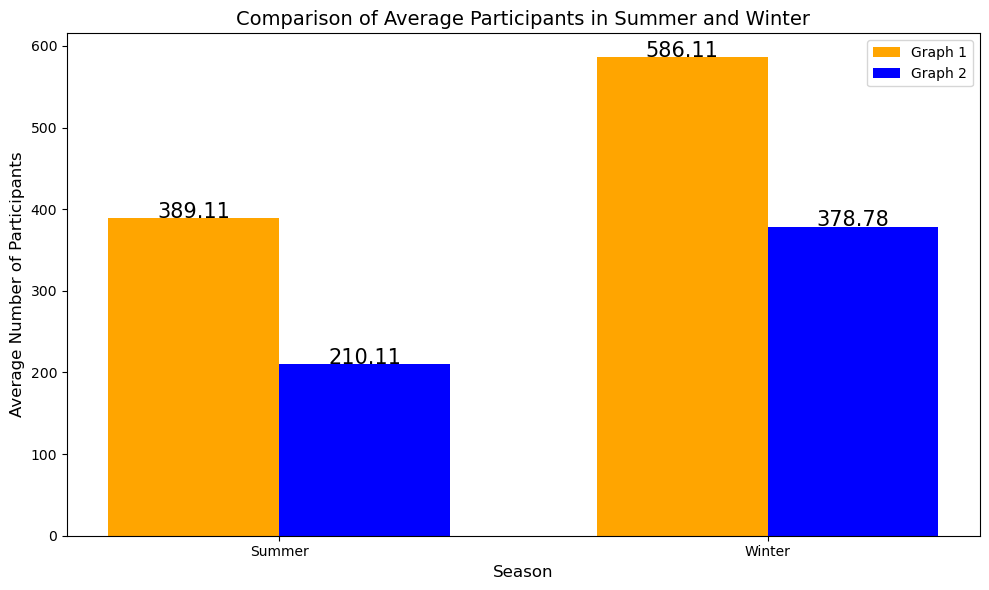

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample DataFrame
data = {
    "name": people_date_only['name'],
    "month": people_date_only['month'],
    "year": people_date_only['year'],
    "tuple_frequency": people_date_only['tuple_frequency']
}
df = pd.DataFrame(data)
df = df[df["year"] >= 2017]

# Define summer and winter months
summer_months = [4, 5, 6, 7, 8, 9]
winter_months = [10, 11, 12, 1, 2, 3]

# Filter data for summer and winter
summer_data = df[df["month"].isin(summer_months)]
winter_data = df[df["month"].isin(winter_months)]

# Calculate average number of participants for summer and winter
average_summer_graph1 = summer_data["tuple_frequency"].sum() / len(summer_data["year"].unique())
average_winter_graph1 = winter_data["tuple_frequency"].sum() / len(winter_data["year"].unique())

# Display the results
print(f"Average number of participants in summer: {average_summer_graph1}")
print(f"Average number of participants in winter: {average_winter_graph1}")

# ----------------------------------------------

# Sample DataFrame
data = {
    "name": people_date_only['name'],
    "month": people_date_only['month'],
    "year": people_date_only['year'],
    "tuple_frequency": people_date_only['tuple_frequency']
}
df = pd.DataFrame(data)
df = df[df["year"] >= 2017]

# Define summer and winter months
summer_months = [4, 5, 6, 7, 8, 9]
winter_months = [10, 11, 12, 1, 2, 3]

# Filter data for summer and winter
summer_data = df[df["month"].isin(summer_months)]
winter_data = df[df["month"].isin(winter_months)]

# Calculate the number of unique participants for summer and winter
unique_summer = summer_data.groupby("year")["name"].nunique()
unique_winter = winter_data.groupby("year")["name"].nunique()

# Calculate the average number of unique participants for summer and winter
average_summer_graph2 = unique_summer.mean()
average_winter_graph2 = unique_winter.mean()

# Display the results
print(f"Average number of unique participants in summer: {average_summer_graph2}")
print(f"Average number of unique participants in winter: {average_winter_graph2}")

#-------------------------------------------

# Data for the bar graph
seasons = ["Summer", "Winter"]
averages_graph1 = [average_summer_graph1, average_winter_graph1]  # Replace with values from Graph 1
averages_graph2 = [average_summer_graph2, average_winter_graph2]  # Replace with values from Graph 2

# X-axis positions for the bars
x = np.arange(len(seasons))

# Bar width
bar_width = 0.35

# Plot the double bar graph
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, averages_graph1, width=bar_width, color="orange", label="Graph 1")
plt.bar(x + bar_width / 2, averages_graph2, width=bar_width, color="blue", label="Graph 2")

# Add labels and title
plt.title("Comparison of Average Participants in Summer and Winter", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Number of Participants", fontsize=12)
plt.xticks(x, seasons)
plt.legend()

# Add value labels on top of the bars
for i, value in enumerate(averages_graph1):
    plt.text(i - bar_width / 2, value + 0.5, f"{value:.2f}", ha="center", fontsize=15)
for i, value in enumerate(averages_graph2):
    plt.text(i + bar_width / 2, value + 0.5, f"{value:.2f}", ha="center", fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()

Total number of participants in summer: 3502
Total number of participants in winter: 5275


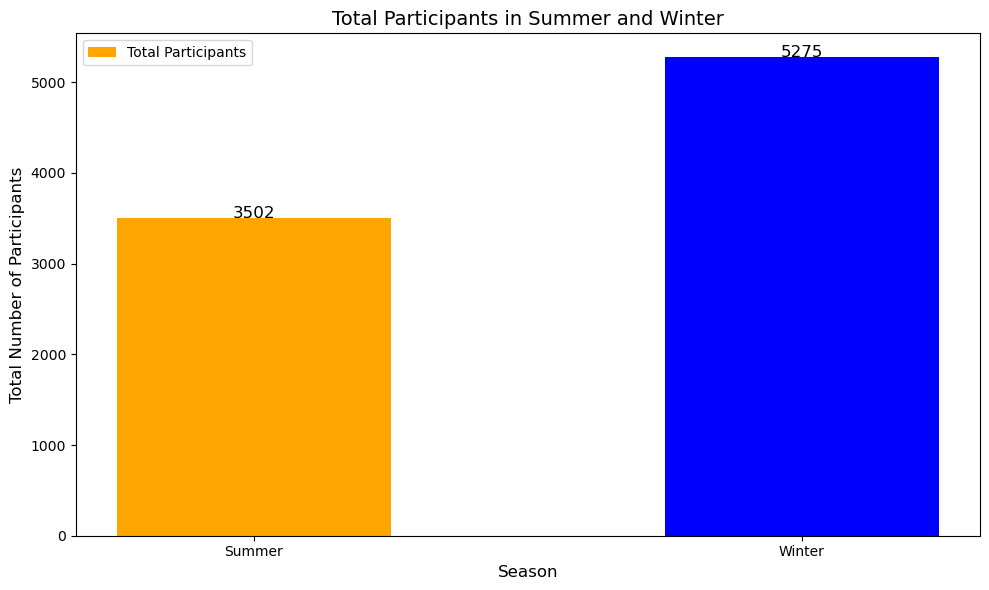

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample DataFrame
data = {
    "name": people_date_only['name'],
    "month": people_date_only['month'],
    "year": people_date_only['year'],
    "tuple_frequency": people_date_only['tuple_frequency']
}
df = pd.DataFrame(data)
df = df[df["year"] >= 2017]

# Define summer and winter months
summer_months = [4, 5, 6, 7, 8, 9]
winter_months = [10, 11, 12, 1, 2, 3]

# Filter data for summer and winter
summer_data = df[df["month"].isin(summer_months)]
winter_data = df[df["month"].isin(winter_months)]

# Calculate total number of participants for summer and winter
total_summer = summer_data["tuple_frequency"].sum()
total_winter = winter_data["tuple_frequency"].sum()

# Display the results
print(f"Total number of participants in summer: {total_summer}")
print(f"Total number of participants in winter: {total_winter}")

# Data for the bar graph
seasons = ["Summer", "Winter"]
totals = [total_summer, total_winter]

# X-axis positions for the bars
x = np.arange(len(seasons))

# Bar width
bar_width = 0.5

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x, totals, width=bar_width, color=["orange", "blue"], label="Total Participants")

# Add labels and title
plt.title("Total Participants in Summer and Winter", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Total Number of Participants", fontsize=12)
plt.xticks(x, seasons)
plt.legend()

# Add value labels on top of the bars
for i, value in enumerate(totals):
    plt.text(i, value + 0.5, f"{value:.0f}", ha="center", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

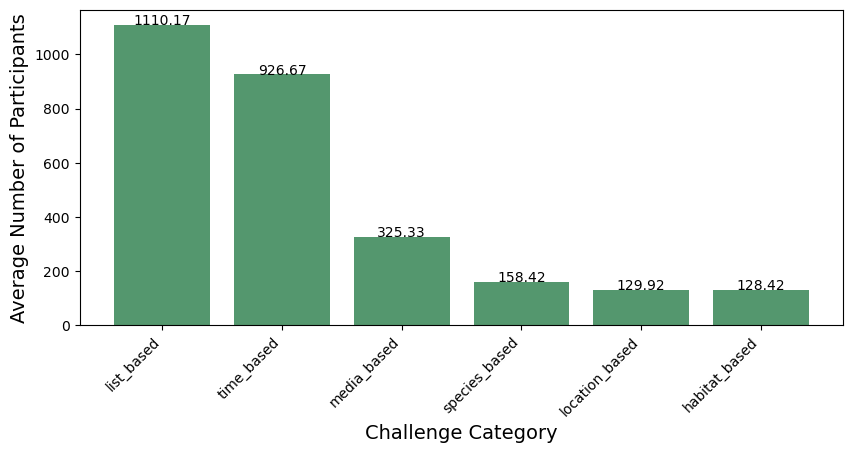

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
data = {
    "name": people_date['name'],
    "month": people_date['month'],
    "year": people_date['year'],
    "tuple_frequency": people_date['tuple_frequency'],
    "list_based": people_date['list_based'],
    "location_based": people_date['location_based'],
    "species_based": people_date['species_based'],
    "habitat_based": people_date['habitat_based'],
    "media_based": people_date['media_based'],
    "time_based":  people_date['time_based']
}
df = pd.DataFrame(data)

# Calculate the average number of participants for each category
categories = ["list_based", "location_based", "species_based", "habitat_based", "media_based", "time_based"]
averages = {category: df[category].sum() / len(df["year"].unique()) for category in categories}

# Sort the averages by value
sorted_averages = dict(sorted(averages.items(), key=lambda item: item[1], reverse=True))

# Plot the bar graph
plt.figure(figsize=(10, 6))  # Increased figure size
plt.bar(sorted_averages.keys(), sorted_averages.values(), color="#54976E")

# Add labels and title
plt.xlabel("Challenge Category", fontsize=14)
plt.ylabel("Average Number of Participants", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout(pad=6)  # Adjusted padding for better visibility

# Add values on top of the bars
for i, value in enumerate(sorted_averages.values()):
    plt.text(i, value + 0.5, f"{value:.2f}", ha="center", fontsize=10)

# Show the plot

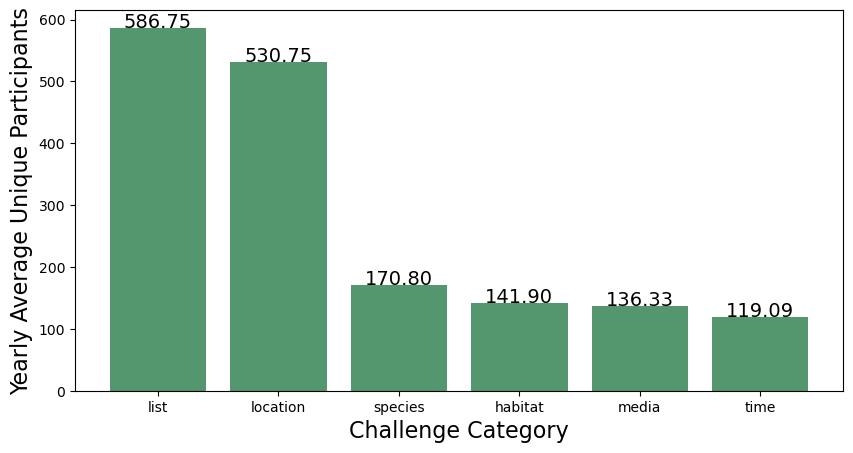

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
data = {
    "name": people_date['name'],
    "month": people_date['month'],
    "year": people_date['year'],
    "tuple_frequency": people_date['tuple_frequency'],
    "list_based": people_date['list_based'],
    "location_based": people_date['location_based'],
    "species_based": people_date['species_based'],
    "habitat_based": people_date['habitat_based'],
    "media_based": people_date['media_based'],
    "time_based": people_date['time_based']
}
df = pd.DataFrame(data)

# List of challenge categories
categories = ["list_based", "location_based", "species_based", "habitat_based", "media_based", "time_based"]

# Dictionary to store yearly average unique participants for each category
avg_unique_participants = {}

for category in categories:
    # Filter rows where the category is participated (value = 1)
    participants = df[df[category] == 1]
    
    # Group by year and count unique names
    yearly_unique_counts = participants.groupby("year")["name"].nunique()
    
    # Calculate the average yearly unique participants
    avg_unique_participants[category] = yearly_unique_counts.mean()

# Sort the averages by value
sorted_avg_unique_participants = dict(sorted(avg_unique_participants.items(), key=lambda item: item[1], reverse=True))

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(sorted_avg_unique_participants.keys(), sorted_avg_unique_participants.values(), color="#54976E")

# Add labels and title
plt.xlabel("Challenge Category", fontsize=16)
plt.ylabel("Yearly Average Unique Participants", fontsize=16)

# Rename x-axis labels
custom_labels = ["list", "location", "species", "habitat", "media", "time"]
plt.xticks(range(len(custom_labels)), custom_labels)

plt.tight_layout(pad=6)

# Add values on top of the bars
for i, value in enumerate(sorted_avg_unique_participants.values()):
    plt.text(i, value + 0.5, f"{value:.2f}", ha="center", fontsize=14)

# Show
plt.show()